# Simulation of Impulse Response Measurements
The software (https://github.com/franzpl/sweep) has been written in the context of my bachelor thesis with the topic "On the influence of windowing of sweep signals for room impulse measurements" at the University of Rostock.
Impulse responses are an important tool to determine acoustic properties of a Device Under Test. The main requirement is that all desired frequencies cover the interesting frequency range with sufficient energy. Therefore, sweep signals and white noise are usally favored to excite DUT's. In this context sweep signals and LTI-Systems were used. However, the design of sweep signals in time domain causes ripple in the excitation spectrum at the start and stop frequency. It is possible to reduce ripple with the use of convenient windows. With this software, you can evaluate the effect of windowing of sweep signals on impulse responses under the influence of noise. This Ipython3 Notebook shows an examplary impulse response measurement (Sweep -> DUT -> System Response -> Impulse Response -> Quality of Impulse Response). You can also use the software for real measurements, because measurement module and simulation module are seperated strictly. <br>
Let's start the simulation of an impulse response measurement! 

# Imports
First, you need imports from Python and the software.

### Python Modules

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Software Modules

In [22]:
import generation
import plotting
import ir_imitation
import calculation
import windows
import measurement_chain

# Excitation
Than, you have to design the excitation signal.
## Excitation Parameters

In [23]:
fs = 44100
fstart = 1
fstop = 22050
duration = 1  # seconds
pad = 5  # attach 5 seconds zeros to excitation signal

## Excitation Signal
Generate a excitation signal with the excitation parameters above.

In [24]:
excitation = generation.log_sweep(fstart, fstop, duration, fs)

### Plot Time Domain

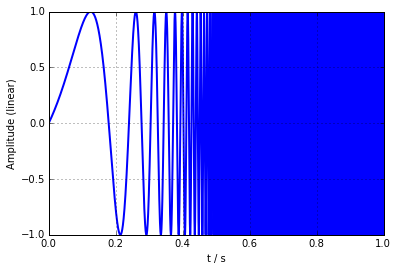

In [25]:
plotting.plot_time(excitation, fs);

### Plot Frequency Domain
As shown in this figure, the excitation spectrum is characterized by ripple at the start and stop frequency.

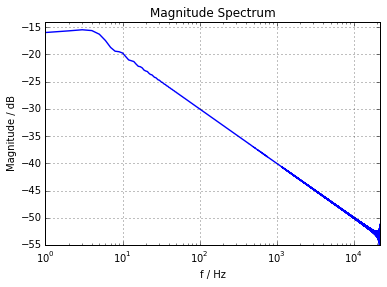

In [26]:
plotting.plot_freq(excitation, fs, scale='db')
plt.xscale('log')
plt.xlim([1, fs/2])
plt.ylim([-55, -14]);

## Window Parameters
A window reduces the ringing artifacts. Fade in and fade out parameters of the window can help to produce a smoother spectrum. 

In [27]:
fade_in = 50  # ms
fade_out = 10  # ms
beta = 7  # kaiser window

## Windowed Sweep


In [28]:
window = windows.window_kaiser(len(excitation), fade_in, fade_out, fs, beta)
excitation_windowed = window * excitation

## Zeropadding
Zeropadding makes space for the recording signal. 

In [29]:
excitation_windowed_zeropadded = generation.zero_padding(excitation_windowed, pad, fs)

### Plot Zeropadded Windowed Sweep

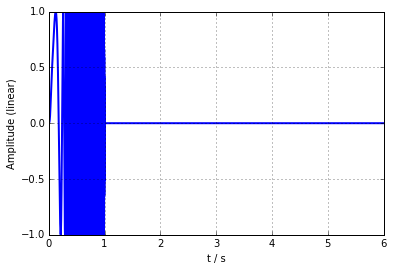

In [30]:
plotting.plot_time(excitation_windowed_zeropadded, fs);

# System
Now, you have to design the DUT.
## FIR-Filter System
 For a better understanding, in this example a dirac impuls was used as filter. 

In [31]:
dirac = measurement_chain.convolution([1])

## Noise System
In addition, you can define the system with additve noise. 

In [32]:
noise_level = -30  # RMS (dB)
awgn = measurement_chain.additive_noise(noise_level)

## Combinate System Elements
Finally, the system elements must be combined. Feel free to add more elements (lowpass, bandpass, gain, ...) to the system.

In [33]:
system = measurement_chain.chained(dirac, awgn)

# System Response
To record the system response, you have to simply pass the excitation signal to the system.

In [34]:
system_response = system(excitation_windowed_zeropadded)

### Plot System Response

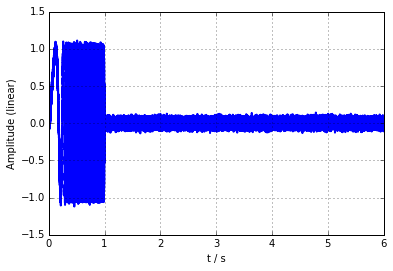

In [35]:
plotting.plot_time(system_response,fs);


# Impulse Response
Via the FFT and IFFT, the impulse response is calculated. That's it! A Plot with linear and dB scale show you the characteristics of the IR. 

In [36]:
ir = calculation.deconv_process(excitation_windowed_zeropadded, system_response, fs)[:len(excitation_windowed_zeropadded)]

### Plot Impulse Response (linear)

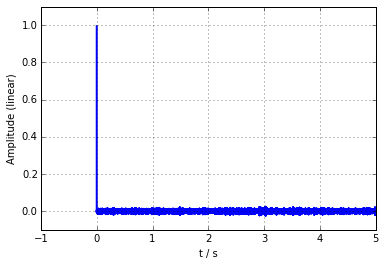

In [37]:
plotting.plot_time(ir, fs)
plt.xlim([-1, 5])
plt.ylim([-0.1, 1.1]);

### Plot Impulse Response (dB)

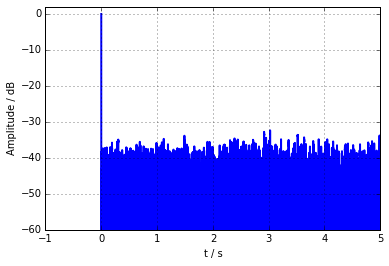

In [38]:
plotting.plot_time(ir, fs, scale='db')
plt.xlim([-1, 5])
plt.ylim([-60, 2]);

# Impulse Response Quality
The 'Peak to Noise Ratio' provides information about the quality of the IR.

In [39]:
pnr = calculation.pnr_db(ir[0], ir[fs:pad*fs])
print(str(pnr), 'dB')

44.4698202175 dB
